In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("../data/happiness.xlsx")

In [3]:
df.tail()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
138,Congo (Kinshasa),3.2954,3.462328,3.128472,0.533670,0.664700,0.261508,0.472705,0.188676,0.072167,1.102014
139,Sierra Leone,3.2452,3.366252,3.124148,0.654278,0.565977,0.253321,0.469035,0.181365,0.053299,1.067906
140,Lesotho,3.1862,3.468785,2.903615,0.770807,0.850587,0.000000,0.523188,0.082087,0.084969,0.874525
141,Lebanon,2.7065,2.796744,2.616256,1.376726,0.576713,0.556247,0.173223,0.067641,0.028772,-0.072831
142,Afghanistan,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903


In [4]:
happiest = df.head(10)

In [5]:
no_freedom = df.tail(10)
no_freedom.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
import duckdb

no_freedom = duckdb.query("""
             SELECT "Country name", "Explained by: Freedom to make life choices"
             FROM no_freedom
             WHERE "Explained by: Freedom to make life choices" IS NOT NULL
             """).df()




In [7]:
value = no_freedom.loc[no_freedom["Country name"] == "Afghanistan", "Explained by: Freedom to make life choices"].values[0]
print(value)


0.0


C:\Users\nirre\AppData\Local\Temp\ipykernel_13080\461606062.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


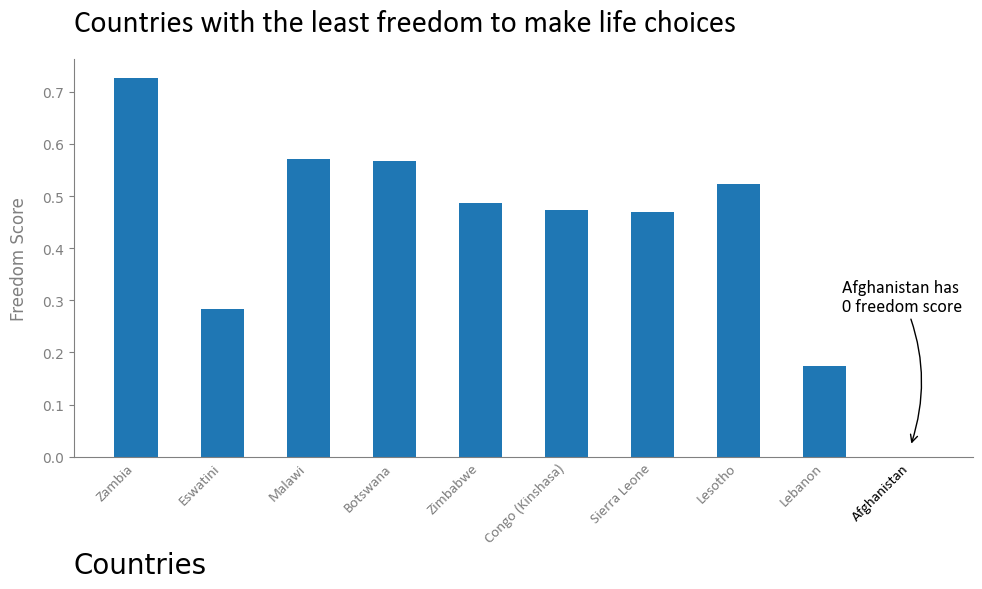

In [9]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(figsize = (10,6))
ax.bar(no_freedom['Country name'],no_freedom["Explained by: Freedom to make life choices"],
       width= 0.5,)
ax.set_title("Countries with the least freedom to make life choices",loc = "left",pad = 20,
             fontsize = 22,family = "Calibri")

plt.xticks(rotation=45, ha="right", fontsize=11,family = "Calibri",color = "gray")
ax.set_xlabel("Countries",fontsize = 20,loc = "left")
ax.tick_params(axis='y',colors = 'gray')
ax.set_ylabel("Freedom Score",fontsize = 12,labelpad = 10,color = "gray")
ax.tick_params(axis = 'x', length = 0 )
ax.spines[["right", "top"]].set_visible(False)
ax.spines[['left','bottom']].set_color("gray")
# ax.set_xticks


# Hämta alla x-labels
xtick_labels = ax.get_xticklabels()

# Ändra färg på t.ex. "Afghanistan"
for label in xtick_labels:
    if label.get_text() == "Afghanistan":
        label.set_color("black")  # valfri färg


afghanistan_score = no_freedom.loc[
    no_freedom["Country name"] == "Afghanistan",
    "Explained by: Freedom to make life choices"
].values[0]

ax.annotate(
    text="Afghanistan has\n0 freedom score",
    xy=(9.,afghanistan_score+ 0.02),  # vart pilen ska peka
    xytext=(8.2,0.28), #vart texten ska ligga 
    textcoords="data",
    fontsize=13,
    family="Calibri",
    arrowprops=dict(
        arrowstyle = '->',
                    color = "black",
                    connectionstyle = "arc3,rad= -0.2"
                    

    )
)

plt.tight_layout()
fig.show()
plt.savefig("../plots/freedom.png")
